In [30]:
import matplotlib.pyplot as plt
import numpy as np


Q1
---


In [31]:
def choose_ball(x):
    choice = np.random.random()
    if x == 0:
        return("error")
    else:
        if (choice < x):
            return(1)
        elif((choice  > x ) and (choice < 2*x)):
            return(2)
        else:
            return(3)

choose_ball(0.4) 

3

In [32]:
##init for varaible values


bankroll = 1000
bet_amt = 10
num_steps = 1000
x_vals=np.linspace(0.01, 0.49, 49)
num_simulations = 1000
colour = 1
print(x_vals)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49]


In [33]:
def ConstSimulation(num_steps, x, bankroll, bet_amt, colour):
    State = [bankroll]
    
    for i in range(num_steps):
        if(choose_ball(x) == colour):
            if colour == 3:
                bankroll += 17* bet_amt
            else:
                bankroll +=  bet_amt
            if(colour == 2):
                colour = 1
            if(colour == 1):
                colour = 2
        else:
            bankroll -= bet_amt
        State.append(bankroll)
        if(bankroll == 0):
            break
    return State


In [34]:
## part 1: constant bet on red /black

part1_ER=[]
part1_ROR=[]

for x in x_vals:
    sum=0
    ruinCount=0
    for simulation in range(num_simulations):
        val=ConstSimulation(num_steps, x, bankroll, bet_amt, colour)[-1]
        sum +=val
        if(val == 0):
            ruinCount+=1
    ExpectedReturn = sum/num_simulations
    RateOfRuin=ruinCount/num_simulations
    part1_ER.append(ExpectedReturn)
    part1_ROR.append(RateOfRuin)
print(part1_ER)
print(part1_ROR)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06, 1.94, 14.44, 45.46, 118.24, 240.38, 415.54, 593.02, 792.92]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.985, 0.917, 0.797, 0.579, 0.317, 0.123, 0.053, 0.011]


In [57]:
def DoubleSimulation(num_steps, x, bankroll, bet_amt, colour):
    State = [bankroll]
    bet_init = bet_amt
    for i in range(num_steps):

        if(choose_ball(x) == colour):
            bankroll += bet_amt
            bet_amt = bet_init
            if(colour == 2):
                colour = 1
            else:
                colour = 2
        else:
            bankroll -= bet_amt
            bet_amt *= 2
            if(bet_amt >= bankroll):
                bet_amt = bankroll
                
        State.append(bankroll)
        if(bankroll == 0):
            break
    return State


In [58]:
#part 2: doubling bets


sum=0
ruinCount=0

for x in x_vals:
    sum=0
    ruinCount=0
    for simulation in range(num_simulations):
        val=DoubleSimulation(num_steps, x, bankroll, bet_amt, colour)[-1]
        sum +=val
        if(val == 0):
            ruinCount+=1
    ExpectedReturn = sum/num_simulations
    RateOfRuin=ruinCount/num_simulations
print(ExpectedReturn)
print(RateOfRuin)

80.95
0.981


In [59]:

part2_ER=[]
part2_ROR=[]

for x in x_vals:
    sum=0
    ruinCount=0
    for simulation in range(num_simulations):
        val=DoubleSimulation(num_steps, x, bankroll, bet_amt, colour)[-1]
        sum +=val
        if(val == 0):
            ruinCount+=1
    ExpectedReturn = sum/num_simulations
    RateOfRuin=ruinCount/num_simulations
    part2_ER.append(ExpectedReturn)
    part2_ROR.append(RateOfRuin)

print(part2_ER)
print(part2_ROR)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.31, 3.44, 42.36, 49.04, 86.39, 63.42, 147.0, 103.4, 96.33]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.999, 0.999, 0.991, 0.989, 0.981, 0.987, 0.969, 0.979, 0.981]


In [40]:
#part 3: constant bet on Green

colour = 3
sum=0
ruinCount=0

for simulation in range(num_simulations):
    val=ConstSimulation(num_steps, x, bankroll, bet_amt, colour)[-1]
    sum +=val
    if(val == 0):
        ruinCount+=1

ExpectedReturn = sum/num_simulations
RateOfRuin=ruinCount/num_simulations
print(ExpectedReturn)
print(RateOfRuin)

0.0
1.0


In [54]:

part3_ER=[]
part3_ROR=[]

for x in x_vals:
    sum=0
    ruinCount=0
    for simulation in range(num_simulations):
        val=ConstSimulation(num_steps, x, bankroll, bet_amt, colour)[-1]
        sum +=val
        if(val == 0):
            ruinCount+=1
    ExpectedReturn = sum/num_simulations
    RateOfRuin=ruinCount/num_simulations
    part3_ER.append(ExpectedReturn)
    part3_ROR.append(RateOfRuin)

print(part3_ER)
print(part3_ROR)

[167358.24, 163800.18, 160262.46, 156588.48, 153025.56, 149339.52, 145701.0, 142280.64, 138603.78, 135056.7, 131503.32, 127807.02, 124157.16, 120463.92, 116934.66, 113557.86, 109744.02, 106266.6, 102628.62, 98876.34, 95390.28, 91826.64, 88140.42, 84685.5, 81010.98, 77255.64, 73783.44, 70059.06, 66712.5, 62938.44, 59540.58, 55779.84, 52170.3, 48672.18, 45047.16, 41356.08, 37749.6, 34319.88, 30603.96, 27004.14, 23347.26, 19742.4, 16257.6, 12673.44, 8961.84, 5362.2, 1672.2, 19.08, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005, 0.254, 0.98, 1.0]


In [42]:
def RandSimulation(num_steps, x, bankroll, bet_amt):
    State = [bankroll]
    
    for i in range(num_steps):
        colour=np.random.choice([1, 2, 3])
        if(choose_ball(x) == colour):
            if colour == 3:
                bankroll += 17* bet_amt
            else:
                bankroll += bet_amt
        else:
            bankroll -= bet_amt
        State.append(bankroll)
        if(bankroll == 0):
            break
    return State


In [43]:
#part 4: Random Betting


sum=0
ruinCount=0

for simulation in range(num_simulations):
    val=RandSimulation(num_steps, x, bankroll, bet_amt)[-1]
    sum +=val
    if(val == 0):
        ruinCount+=1

ExpectedReturn = sum/num_simulations
RateOfRuin=ruinCount/num_simulations
print(ExpectedReturn)
print(RateOfRuin)

2.86
0.99


In [44]:

part4_ER=[]
part4_ROR=[]

for x in x_vals:
    sum=0
    ruinCount=0
    for simulation in range(num_simulations):
        val=RandSimulation(num_steps, x, bankroll, bet_amt)[-1]
        sum +=val
        if(val == 0):
            ruinCount+=1
    ExpectedReturn = sum/num_simulations
    RateOfRuin=ruinCount/num_simulations
    part4_ER.append(ExpectedReturn)
    part4_ROR.append(RateOfRuin)

print(part4_ROR)
print(part4_ER)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.049, 0.27, 0.752, 0.992]
[50032.1, 48749.22, 47811.14, 46566.7, 45664.48, 44706.38, 43521.2, 42453.24, 41268.8, 40373.32, 39316.98, 38277.14, 37123.52, 35984.78, 35081.46, 33829.72, 32804.92, 31634.76, 30788.24, 29621.02, 28654.92, 27366.74, 26531.56, 25421.32, 24379.82, 23194.42, 22252.84, 21103.22, 20010.9, 18949.62, 17984.28, 16982.68, 15734.6, 14728.84, 13624.5, 12555.5, 11413.8, 10516.64, 9391.92, 8307.86, 7252.32, 6165.24, 5138.36, 4108.8, 3001.4, 1935.22, 869.88, 157.68, 3.22]


## Graphs and Analysis
---

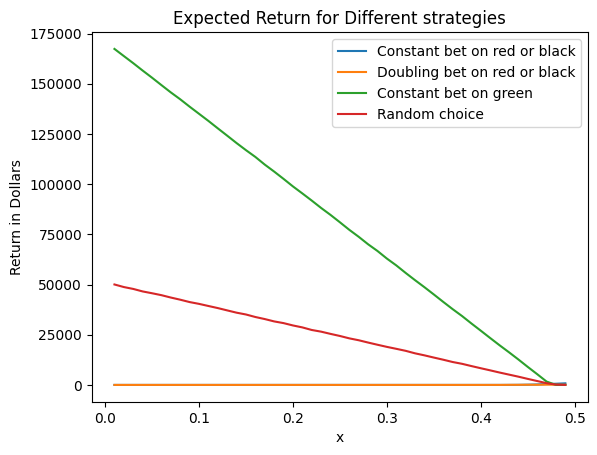

In [60]:
plt.plot(x_vals, part1_ER)
plt.plot(x_vals, part2_ER)
plt.plot(x_vals, part3_ER)
plt.plot(x_vals, part4_ER)
plt.title("Expected Return for Different strategies")
plt.xlabel("x")
plt.ylabel("Return in Dollars")
plt.legend(['Constant bet on red or black', 'Doubling bet on red or black', 'Constant bet on green', 'Random choice'])
plt.show()

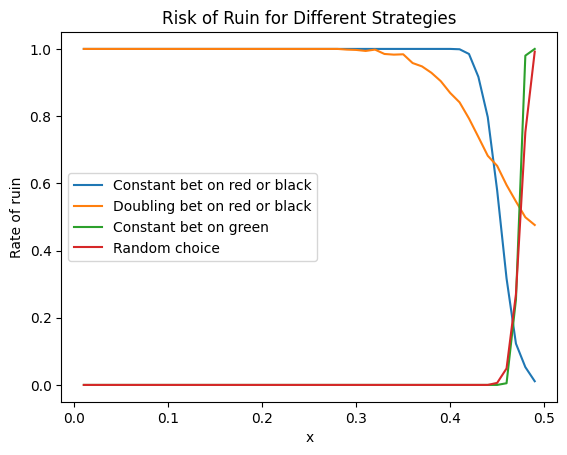

In [56]:
plt.plot(x_vals, part1_ROR)
plt.plot(x_vals, part2_ROR)
plt.plot(x_vals, part3_ROR)
plt.plot(x_vals, part4_ROR)
plt.legend(['Constant bet on red or black', 'Doubling bet on red or black', 'Constant bet on green', 'Random choice'])
plt.xlabel("x")
plt.ylabel("Rate of ruin")
plt.title("Risk of Ruin for Different Strategies")
plt.show()

## Analysis

1000 simulations with 1000 steps each were done for 49 x values starting from 0.01 to 0.49 (because none of the probabilities can become zero). The results obtained for each betting strategy are analyzed as follows:

1. **Constant Betting on Red/Black:**
   - Returns: Initially negative, increasing with higher x values. This trend indicates a greater likelihood of winning on red or black with more rounds played.
   - Risk: Begins at 100% and decreases as x increases. Lower x values pose a higher risk of total loss due to the lower probability of winning on red or black.

2. **Doubling Bet on Red/Black:**
   - Returns: Follows a similar pattern to constant betting, starting negative and rising with increasing x. While offering potentially higher returns, it also entails elevated risks.
   - Risk: Starts at 100% and diminishes as x increases. This decline reflects the reduced likelihood of consecutive losses with higher x values.

3. **Constant Betting on Green:**
   - Returns: Initially high, declining as x grows. Betting on green boasts a substantial payout but with a low probability, making it advantageous primarily for very low x values.
   - Risk: Begins at 0 and rises sharply as x increases. As x rises, the probability of winning on green declines, heightening the risk of total loss.

   This occurs because the likelihood of green diminishes as x increases, while the expected return significantly rises due to the 18-fold bet amount upon winning.
  
4. **Random Betting:**
   - Returns: Fluctuates randomly around a certain value, relatively unaffected by x. This behavior aligns with the randomness of the strategy, independent of x.
   - Risk: Resembles the risk trend of constant betting on green, initiating at 0 and steeply escalating as x exceeds 45. Higher x values reduce the probability of winning on green, escalating the risk of total loss.

### Best Strategy
For values of x ≤ .46, the optimal strategy is constant betting on green.

For values of x > .46, the superior strategy is constant betting on black or red. Despite its comparable returns to doubling the bet, this strategy minimizes the risk of ruin.

## Q2
---


To derive the recursion for $ q_n $, let's consider the possibilities after $ n $ tosses:

1. If the $ n^{th}$ toss results in a head, then there have been $ (n-1) $ tosses with an even number of heads.
2. If the $ n^{th}$ toss results in a tail, then there have been $ (n-1) $ tosses with an odd number of heads.

Let $ q_n $ represent the probability of having an even number of heads after $ n $ tosses. We can express $ q_n $ as the sum of two probabilities:

1. The probability of having an odd number of heads after $ n-1 $ tosses and then getting a head on the $ n $th toss.
2. The probability of having an even number of heads after $ n-1 $ tosses and then getting a tail on the $ n $th toss.

Mathematically:

$$ q_n = (1-p) \cdot q_{n-1} + p \cdot (1 - q_{n-1}) $$

Expanding this equation:

$$ q_n = (1-p) \cdot q_{n-1} + p - p \cdot q_{n-1} $$

Simplifying:

$$ q_n = p + (1 - 2p) \cdot q_{n-1} $$

This is the recursion relating $ q_n $ to $ q_{n-1} $.

To solve this recursion, cancel the terms in a telescoping manner after multiplying both sides by (1-2p)

$$ q_{n-1}-p = (1 - 2p) \cdot q_{n-2} $$
$$ q_{n-2}-p = (1 - 2p) \cdot q_{n-3} $$
$$ q_{n-3}-p = (1 - 2p) \cdot q_{n-4} $$
$$ \vdots $$
$$ q_{1}-p = (1 - 2p) \cdot q_{0} $$
$$ \implies q_n=(1-2p)^n \cdot (q_0-\frac{1}{2})$$

But due to the requirements stated in the question, the value of $q_0$ is 1.

Thus, the solution is:

$$ q_n = \frac{1 + (1 - 2p)^n}{2} $$

This completes the solution.

## Q3
---

a) Let's find the probability that the plane fails to complete a four-hour flight due to engine failure. Since the two engines operate independently, and the plane can fly on only one engine, the only way that it will be unable to complete the journey is if both engines fail simultaneously.

Let $p $ be the probability of an engine failing in a four-hour flight. Since each engine has a 1% chance of failing, $ p = 0.01 $.


$
\mathbb P(\text{both engines failing simultaneously}) = (0.01)\times(0.01) = 10 ^ {-4} \text{ or } 0.01\%
$



b) To find the probability that at least two people have the same birthday in a room of 30 people, we can use the complement rule. That is, we find the probability that no two people have the same birthday and subtract it from 1.

The probability that the first person has a unique birthday is 1. The probability that the second person has a different birthday from the first is $ \frac{364}{365} $, since there are 364 days left in a non-leap year. Similarly, the probability that the third person has a different birthday from the first two is $ \frac{363}{365} $, and so on.

So, the probability that all 30 people have different birthdays is:

$$
\frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \ldots \times \frac{336}{365}
$$

Therefore, the probability that at least two people have the same birthday is:

$$
1 - \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \ldots \times \frac{336}{365}
$$

This may be represented as

$$ 1 - \frac{^nP_k}{(365)^{n}}$$
here, n = 30.
These formulas represent the probabilities for the given scenarios.